In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:

df = pd.read_csv(r"C:\Users\Admin\Desktop\InfosysInternship\Energy_consumption.csv")

In [4]:
df.head

<bound method NDFrame.head of                Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0    2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1    2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2    2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3    2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4    2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   
..                   ...          ...        ...            ...        ...   
995  2022-02-11 11:00:00    28.619382  48.850160    1080.087000          5   
996  2022-02-11 12:00:00    23.836647  47.256435    1705.235156          4   
997  2022-02-11 13:00:00    23.005340  48.720501    1320.285281          6   
998  2022-02-11 14:00:00    25.138365  31.306459    1309.079719          3   
999  2022-02-11 15:00:00    23.051165  42.615421    1018.140606          6   

    HVACUsage LightingUsage  Rene

In [5]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [6]:
df.shape

(1000, 11)

In [7]:
df.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['Timestamp'].dtype

dtype('O')

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [11]:
df['Timestamp'].dtype

dtype('<M8[ns]')

In [12]:
df = df.sort_values('Timestamp').reset_index(drop=True)

In [13]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeekNum'] = df['Timestamp'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeekNum'].isin([5, 6]).astype(int)

In [14]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Year,Month,Day,Hour,DayOfWeekNum,IsWeekend
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373,2022,1,1,0,5,1
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855,2022,1,1,1,5,1
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888,2022,1,1,2,5,1
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850,2022,1,1,3,5,1
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732,2022,1,1,4,5,1


In [15]:
num_cols = ['Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Capping
    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))

In [16]:
df['HVACUsage'] = df['HVACUsage'].map({'On': 1, 'Off': 0})
df['LightingUsage'] = df['LightingUsage'].map({'On': 1, 'Off': 0})
df['Holiday'] = df['Holiday'].map({'Yes': 1, 'No': 0})

In [17]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Year,Month,Day,Hour,DayOfWeekNum,IsWeekend
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,1,0,2.774699,Monday,0,75.364373,2022,1,1,0,5,1
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,1,1,21.831384,Saturday,0,83.401855,2022,1,1,1,5,1
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,0,0,6.764672,Sunday,0,78.270888,2022,1,1,2,5,1
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,0,1,8.623447,Wednesday,0,56.519850,2022,1,1,3,5,1
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,1,0,3.071969,Friday,0,70.811732,2022,1,1,4,5,1


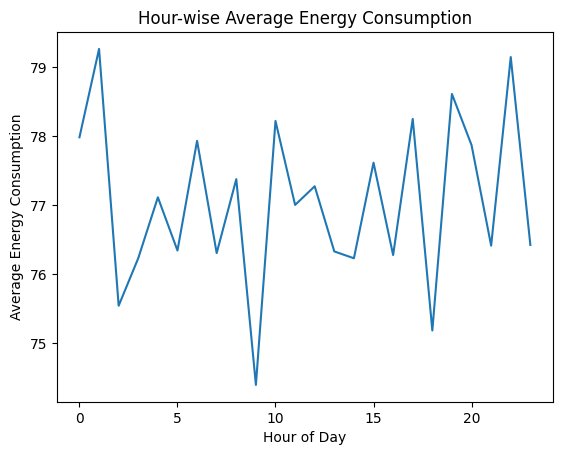

In [18]:
# Hour-wise Energy Consumption
hourly_energy = df.groupby('Hour')['EnergyConsumption'].mean()
plt.figure()
plt.plot(hourly_energy.index, hourly_energy.values)
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy Consumption")
plt.title("Hour-wise Average Energy Consumption")
plt.show()

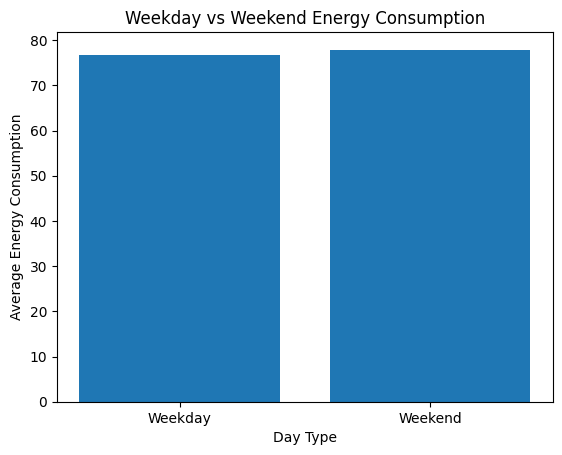

In [19]:
# Weekday vs Weekend Energy Consumption
weekend_energy = df.groupby('IsWeekend')['EnergyConsumption'].mean()
plt.figure()
plt.bar(['Weekday', 'Weekend'], weekend_energy.values)
plt.xlabel("Day Type")
plt.ylabel("Average Energy Consumption")
plt.title("Weekday vs Weekend Energy Consumption")
plt.show()

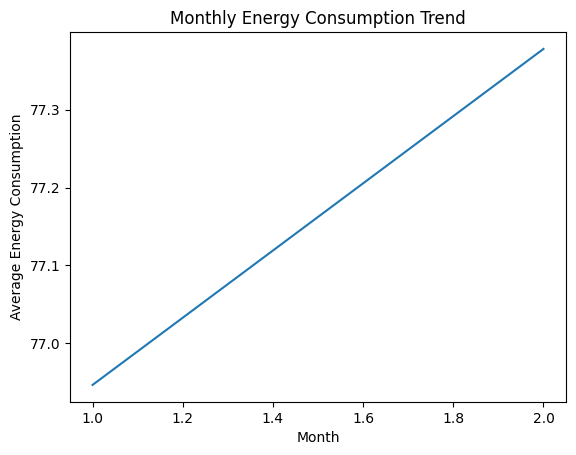

In [20]:
# Monthly Energy Consumption Trend
monthly_energy = df.groupby('Month')['EnergyConsumption'].mean()
plt.figure()
plt.plot(monthly_energy.index, monthly_energy.values)
plt.xlabel("Month")
plt.ylabel("Average Energy Consumption")
plt.title("Monthly Energy Consumption Trend")
plt.show()


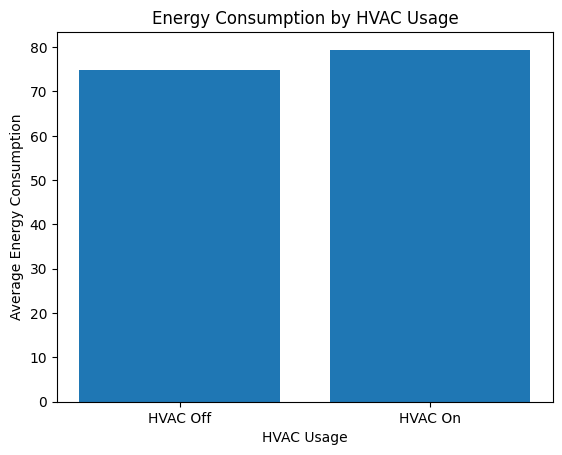

In [21]:
# HVAC Usage vs Energy Consumption
hvac_energy = df.groupby('HVACUsage')['EnergyConsumption'].mean()
plt.figure()
plt.bar(['HVAC Off', 'HVAC On'], hvac_energy.values)
plt.xlabel("HVAC Usage")
plt.ylabel("Average Energy Consumption")
plt.title("Energy Consumption by HVAC Usage")
plt.show()

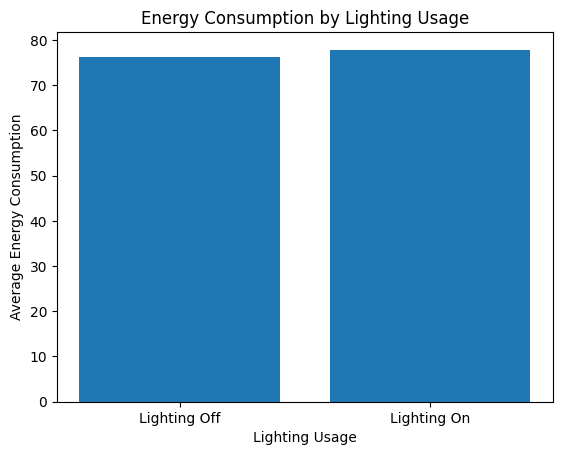

In [22]:
# Lighting Usage vs Energy Consumption
lighting_energy = df.groupby('LightingUsage')['EnergyConsumption'].mean()
plt.figure()
plt.bar(['Lighting Off', 'Lighting On'], lighting_energy.values)
plt.xlabel("Lighting Usage")
plt.ylabel("Average Energy Consumption")
plt.title("Energy Consumption by Lighting Usage")
plt.show()


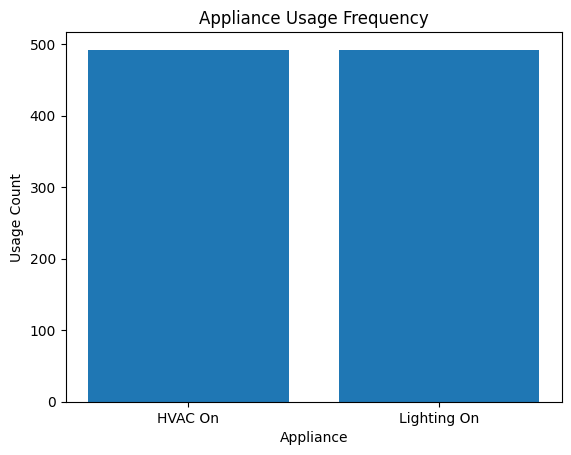

In [23]:
# Appliance Usage Frequency
hvac_count = (df['HVACUsage'] == 1).sum()
lighting_count = (df['LightingUsage'] == 1).sum()
plt.figure()
plt.bar(['HVAC On', 'Lighting On'], [hvac_count, lighting_count])
plt.xlabel("Appliance")
plt.ylabel("Usage Count")
plt.title("Appliance Usage Frequency")
plt.show()

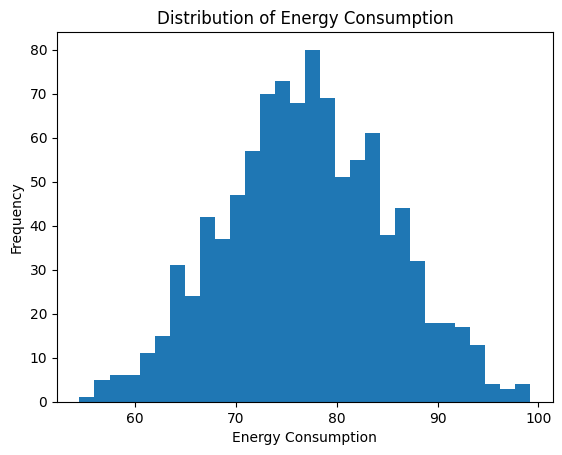

In [24]:
# Energy Consumption Distribution
plt.figure()
plt.hist(df['EnergyConsumption'], bins=30)
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.title("Distribution of Energy Consumption")
plt.show()

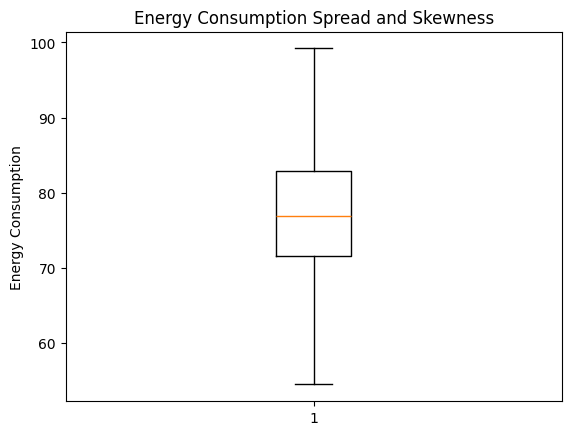

In [25]:
# Energy Consumption Spread and Skewness
plt.figure()
plt.boxplot(df['EnergyConsumption'])
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption Spread and Skewness")
plt.show()

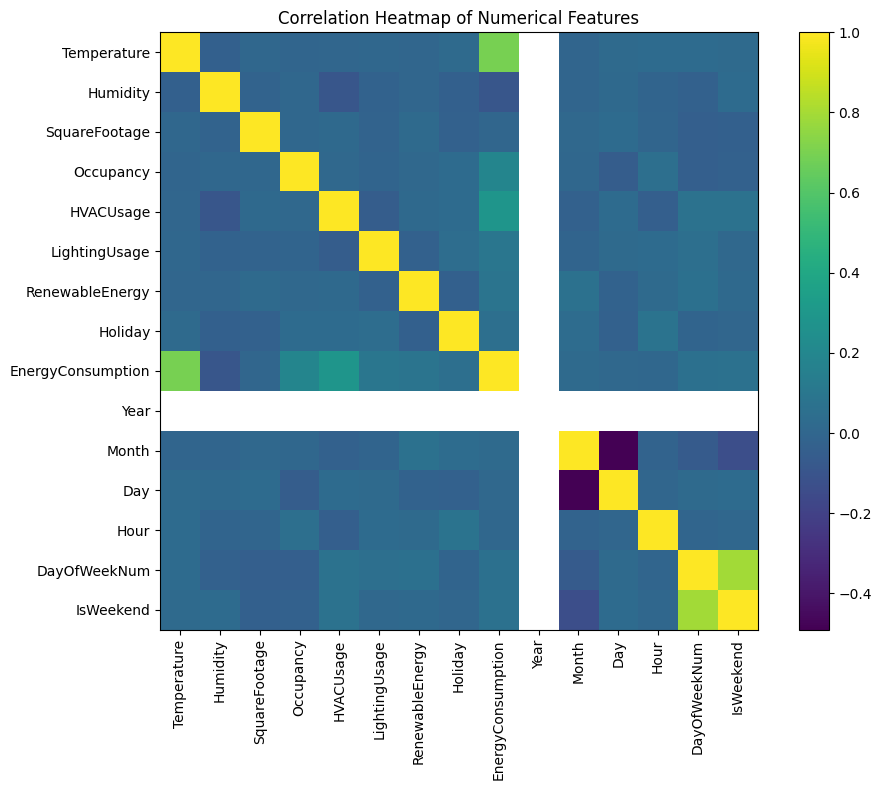

In [26]:
num_df = df.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

In [27]:
df_selected = df.drop(columns=[
    'Year',            
    'Day',             
    'DayOfWeekNum'     
])
X = df_selected.drop(columns=['EnergyConsumption'])
y = df_selected['EnergyConsumption']
print("Selected Features:")
print(X.columns)

Selected Features:
Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'Month', 'Hour', 'IsWeekend'],
      dtype='object')


In [28]:
df['Temp_HVAC'] = df['Temperature'] * df['HVACUsage']
df['Occupancy_Lighting'] = df['Occupancy'] * df['LightingUsage']


In [29]:
df['IsPeakHour'] = df['Hour'].apply(lambda x: 1 if 18 <= x <= 22 else 0)

In [30]:
df['IsNight'] = df['Hour'].apply(lambda x: 1 if (x >= 22 or x <= 5) else 0)

In [31]:
df['EnergyPerPerson'] = df['EnergyConsumption'] / (df['Occupancy'] + 1)

In [32]:
df['NetEnergy'] = df['EnergyConsumption'] - df['RenewableEnergy']

In [33]:
df['RollingMean_3'] = df['EnergyConsumption'].rolling(window=3).mean()
df['RollingStd_3'] = df['EnergyConsumption'].rolling(window=3).std()

In [34]:
df['LogEnergy'] = np.log1p(df['EnergyConsumption'])

In [36]:
df = df.dropna().reset_index(drop=True)

In [37]:
df.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,...,IsPeakHour,IsNight,EnergyPerPerson,NetEnergy,RollingMean_3,RollingStd_3,LogEnergy,Energy_lag_1,Energy_lag_24,Energy_lag_168
0,2022-01-08 00:00:00,25.714735,42.298665,1999.204208,1,1,1,29.565863,Saturday,0,...,0,1,37.807491,46.049118,77.512418,5.807862,4.338793,72.890584,74.179044,75.364373
1,2022-01-08 01:00:00,20.914792,31.710094,1486.780868,5,0,1,4.306860,Friday,0,...,0,1,11.964941,67.482787,73.431738,1.969247,4.287574,75.614982,69.915141,83.401855
2,2022-01-08 02:00:00,25.205341,48.649901,1533.208172,3,0,0,4.054743,Wednesday,0,...,0,1,15.752039,58.953415,70.137596,6.463742,4.159011,71.789647,91.594355,78.270888
3,2022-01-08 03:00:00,25.976524,38.484153,1595.427693,4,1,1,16.205204,Tuesday,0,...,0,1,18.910125,78.345420,76.449476,16.279352,4.559656,63.008158,76.138955,56.519850
4,2022-01-08 04:00:00,27.726414,53.339179,1751.722623,2,1,0,21.647358,Wednesday,1,...,0,1,27.858944,61.929472,80.378538,16.012608,4.437660,94.550625,70.976913,70.811732


In [38]:
scale_cols = [
    'Temperature',
    'Humidity',
    'SquareFootage',
    'Occupancy',
    'RenewableEnergy',
    'Hour',
    'Month',
    'EnergyPerPerson',
    'NetEnergy',
    'Temp_HVAC',
    'Occupancy_Lighting'
]
scale_cols = [col for col in scale_cols if col in X.columns]
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[scale_cols] = scaler.fit_transform(X[scale_cols])

In [39]:
print(X[scale_cols].head())
print(X_scaled[scale_cols].head())


   Temperature   Humidity  SquareFootage  Occupancy  RenewableEnergy  Hour  \
0    25.139433  43.431581    1565.693999          5         2.774699     0   
1    27.731651  54.225919    1411.064918          1        21.831384     1   
2    28.704277  58.907658    1755.715009          2         6.764672     2   
3    20.080469  50.371637    1452.316318          1         8.623447     3   
4    23.097359  51.401421    1094.130359          9         3.071969     4   

   Month  
0      1  
1      1  
2      1  
3      1  
4      1  
   Temperature  Humidity  SquareFootage  Occupancy  RenewableEnergy      Hour  \
0     0.055514 -0.230642       0.227705   0.146290        -1.413722 -1.655100   
1     0.969738  1.037096      -0.308690  -1.250277         0.766292 -1.510373   
2     1.312764  1.586942       0.886871  -0.901135        -0.957284 -1.365646   
3    -1.728681  0.584431      -0.165593  -1.250277        -0.744647 -1.220919   
4    -0.664684  0.705374      -1.408109   1.542858        -1

In [40]:
final_features = [
    'Temperature',        # strongest environmental driver
    'Humidity',           # secondary environmental factor
    'Occupancy',          # direct human activity
    'HVACUsage',          # high energy appliance
    'LightingUsage',      # moderate energy appliance
    'EnergyPerPerson',    # normalized consumption (very strong)
    'SquareFootage',      # building size effect
    'IsPeakHour',         # demand spikes
    'IsWeekend'           # behavior change
]


X = df[final_features]
y = df['EnergyConsumption']


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [42]:
scale_cols = X_train.select_dtypes(include='number').columns

scaler = StandardScaler()
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 3.9369850769089862
RMSE: 4.900043184440936
R²: 0.5972457342199066


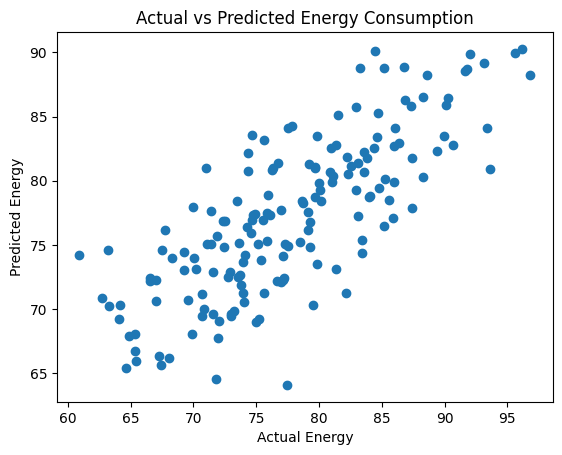

In [45]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Energy")
plt.ylabel("Predicted Energy")
plt.title("Actual vs Predicted Energy Consumption")
plt.show()

In [46]:
#DECISION TREE

In [47]:
dt_model = DecisionTreeRegressor(
    max_depth=10,          
    min_samples_split=10,  
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [48]:
y_pred_dt = dt_model.predict(X_test)

In [49]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print("MAE :", mae_dt)
print("RMSE:", rmse_dt)
print("R²  :", r2_dt)

Decision Tree Performance:
MAE : 5.146582816905848
RMSE: 6.630040937133978
R²  : 0.2626515802157985


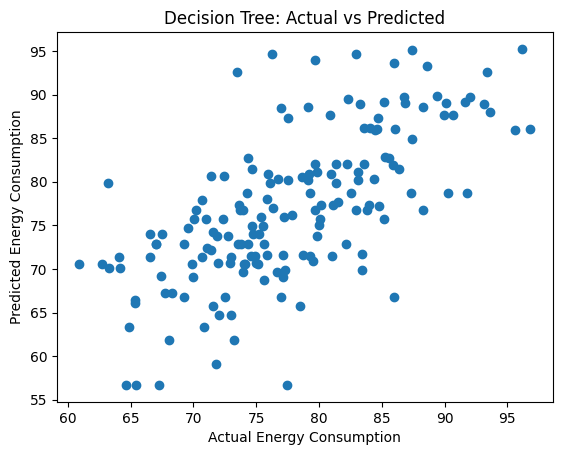

In [50]:
plt.figure()
plt.scatter(y_test, y_pred_dt)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()

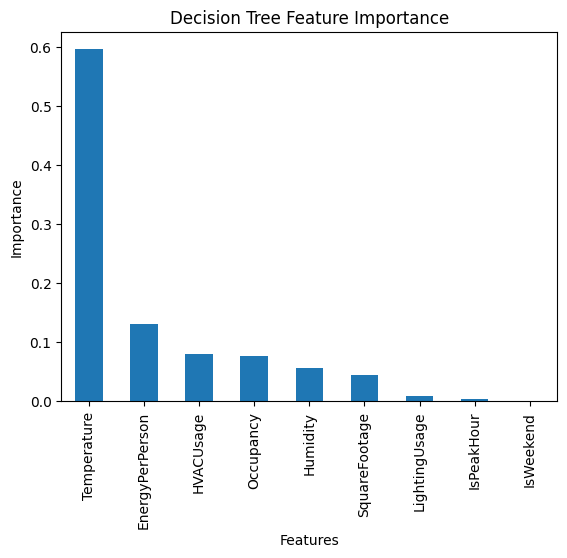

In [51]:
feature_importance = pd.Series(
    dt_model.feature_importances_,
    index=final_features
).sort_values(ascending=False)

plt.figure()
feature_importance.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

In [52]:
#Random Forest

In [53]:
rf_model = RandomForestRegressor(
    n_estimators=200,      
    max_depth=12,           
    min_samples_split=10,   
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1               
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=200, n_jobs=-1, random_state=42)

In [54]:
y_pred_rf = rf_model.predict(X_test)

In [55]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("MAE :", mae_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)

Random Forest Performance:
MAE : 3.664279619379963
RMSE: 4.566076106802145
R²  : 0.650275042644227


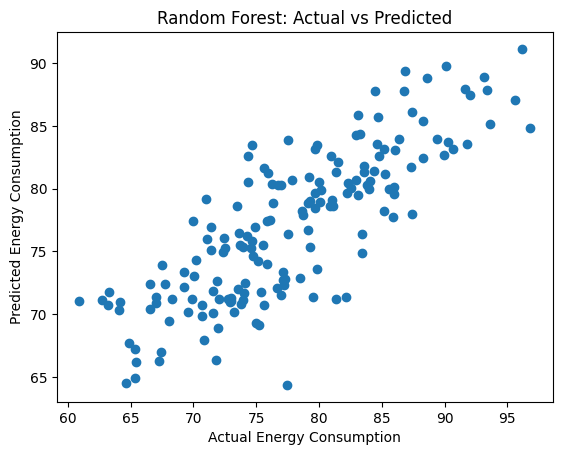

In [56]:
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

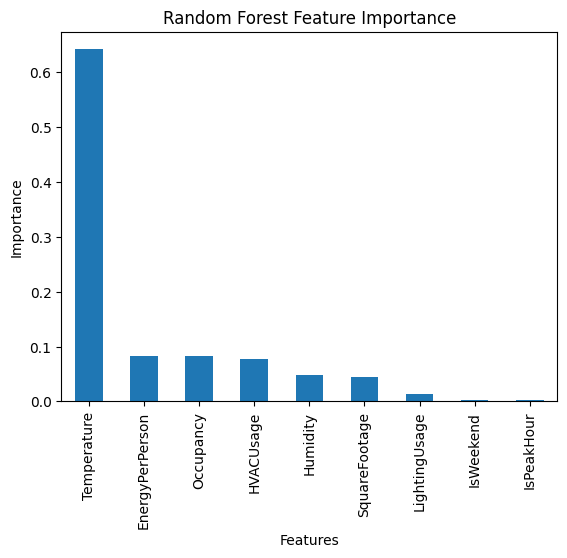

In [57]:
feature_importance_rf = pd.Series(
    rf_model.feature_importances_,
    index=final_features
).sort_values(ascending=False)

plt.figure()
feature_importance_rf.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [58]:
#LIGHTGBM

In [59]:
from lightgbm import LGBMRegressor

In [60]:
lgbm_base = LGBMRegressor(
    random_state=42
)

lgbm_base.fit(X_train, y_train)

y_pred_base = lgbm_base.predict(X_test)

mae_base = mean_absolute_error(y_test, y_pred_base)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))
r2_base = r2_score(y_test, y_pred_base)

print("Baseline LightGBM")
print("MAE:", mae_base)
print("RMSE:", rmse_base)
print("R2:", r2_base)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 665, number of used features: 9
[LightGBM] [Info] Start training from score 77.127369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [61]:
feature_importance = pd.Series(
    lgbm_base.feature_importances_,
    index=final_features
).sort_values(ascending=False)

print(feature_importance)

EnergyPerPerson    745
Occupancy          538
Temperature        412
Humidity           310
SquareFootage      280
HVACUsage           96
LightingUsage       58
IsWeekend           15
IsPeakHour          12
dtype: int32


<Axes: title={'center': 'LightGBM Feature Importance'}>

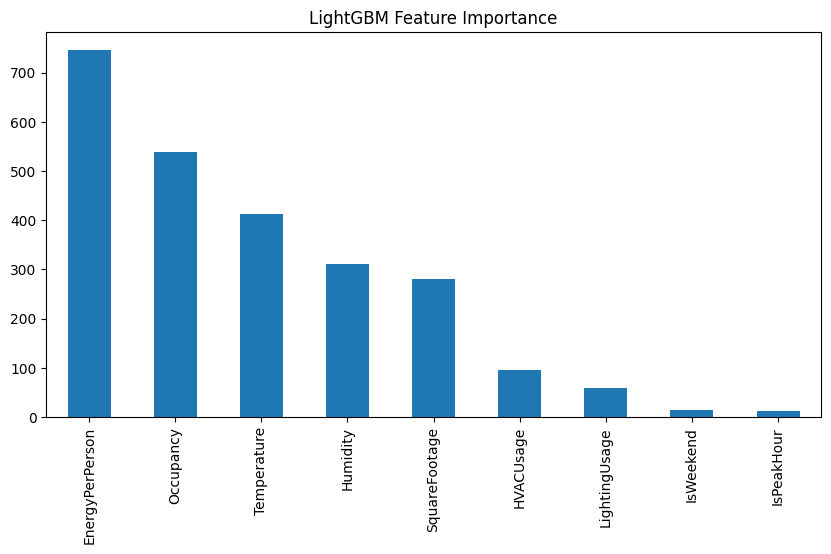

In [62]:
feature_importance.plot(kind='bar', figsize=(10,5), title='LightGBM Feature Importance')

In [63]:
##XGBOOST
from xgboost import XGBRegressor

In [64]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [66]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Performance:")
print("MAE :", mae_xgb)
print("RMSE:", rmse_xgb)
print("R²  :", r2_xgb)


XGBoost Performance:
MAE : 2.4744245126364963
RMSE: 3.189606753716358
R²  : 0.8293467284674239


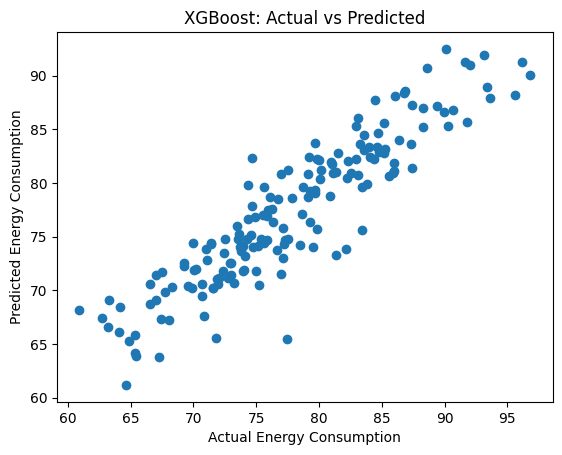

In [67]:
plt.figure()
plt.scatter(y_test, y_pred_xgb)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("XGBoost: Actual vs Predicted")
plt.show()

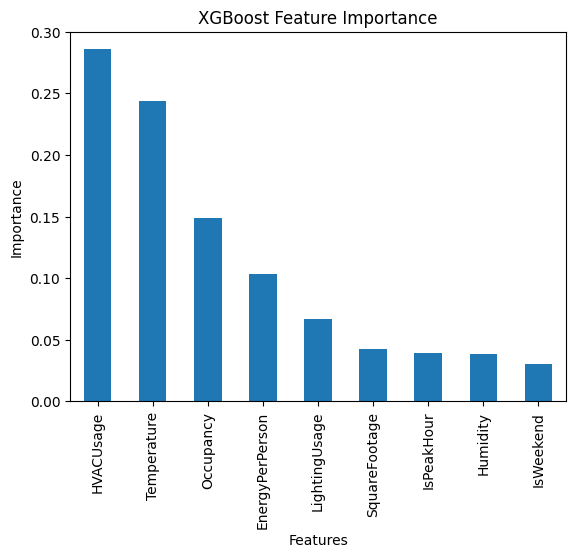

In [68]:
feature_importance_xgb = pd.Series(
    xgb_model.feature_importances_,
    index=final_features
).sort_values(ascending=False)

plt.figure()
feature_importance_xgb.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("XGBoost Feature Importance")
plt.show()

In [69]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


In [81]:
xgb_base = XGBRegressor(
    n_estimators=2400,          # more trees
    learning_rate=0.03,        # slower learning
    max_depth=6,               # balanced depth
    min_child_weight=5,        # avoids overfitting
    subsample=0.8,             # row sampling
    colsample_bytree=0.8,      # feature sampling
    objective='reg:squarederror',
    random_state=42
)

xgb_base.fit(X_train, y_train)

y_pred = xgb_base.predict(X_test)

print("Baseline XGBoost")
print("R2  :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Baseline XGBoost
R2  : 0.8525770677812066
MAE : 2.3160323424221905
RMSE: 2.9645744103200746


In [89]:
xgb_reg = XGBRegressor(
    n_estimators=2400,
    learning_rate=0.03,
    max_depth=6,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.05,    # L1 (light)
    reg_lambda=1.0,   # L2 (light)
    objective='reg:squarederror',
    random_state=42
)

xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

print("Regularized XGBoost")
print("R2  :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Regularized XGBoost
R2  : 0.8515066442980193
MAE : 2.3017417301230725
RMSE: 2.9753176864540944


In [87]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import numpy as np

xgb_cv_model = XGBRegressor(
    n_estimators=2400,
    learning_rate=0.03,
    max_depth=6,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.05,
    reg_lambda=1.0,
    objective='reg:squarederror',
    random_state=42
)

cv_xgb = cross_val_score(
    xgb_cv_model,
    X,
    y,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("XGBoost CV Mean R2:", cv_xgb.mean())
print("XGBoost CV Std  :", cv_xgb.std())



XGBoost CV Mean R2: 0.8335883233489524
XGBoost CV Std  : 0.030144277615240002


In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_child_weight': [1, 3, 5, 7, 10]
}

grid_xgb = GridSearchCV(
    XGBRegressor(
        n_estimators=2400,
        learning_rate=0.03,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.05,
        reg_lambda=1.0,
        objective='reg:squarederror',
        random_state=42
    ),
    param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_

print("Best min_child_weight:", grid_xgb.best_params_)


Best min_child_weight: {'min_child_weight': 10}


In [84]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = best_xgb.predict(X_test)

print("FINAL XGBoost Performance")
print("R2  :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


FINAL XGBoost Performance
R2  : 0.868920413747385
MAE : 2.120831920493703
RMSE: 2.7954219049283817


In [85]:
lgbm_cv_model = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

cv_lgbm = cross_val_score(
    lgbm_cv_model,
    X,
    y,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("LightGBM CV Mean R2:", cv_lgbm.mean())
print("LightGBM CV Std  :", cv_lgbm.std())



LightGBM CV Mean R2: 0.8038949306767289
LightGBM CV Std  : 0.03610320135822827
